In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [3]:
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
lm.fit(X, Y)

LinearRegression()

In [8]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [9]:
lm.intercept_

array([38423.30585816])

In [10]:
lm.coef_

array([[-821.73337832]])

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [12]:
x = df[['engine-size']]

In [13]:
lm1.fit(x, Y)

LinearRegression()

In [14]:
yhat = lm1.predict(x)
yhat[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [15]:
lm1.intercept_

array([-7963.33890628])

In [16]:
lm1.coef_

array([[166.86001569]])

In [17]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [18]:
lm.fit(Z, Y)

LinearRegression()

In [19]:
lm.intercept_

array([-15806.62462633])

In [20]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [21]:
z = df[['normalized-losses', 'highway-mpg']]

In [22]:
lm2= LinearRegression()

In [23]:
lm2.fit(z, Y)

LinearRegression()

In [24]:
lm2.coef_

array([[   1.49789586, -820.45434016]])

In [25]:
lm2.intercept_

array([38201.31327246])

In [26]:
import seaborn as sns

(0.0, 48165.621734646)

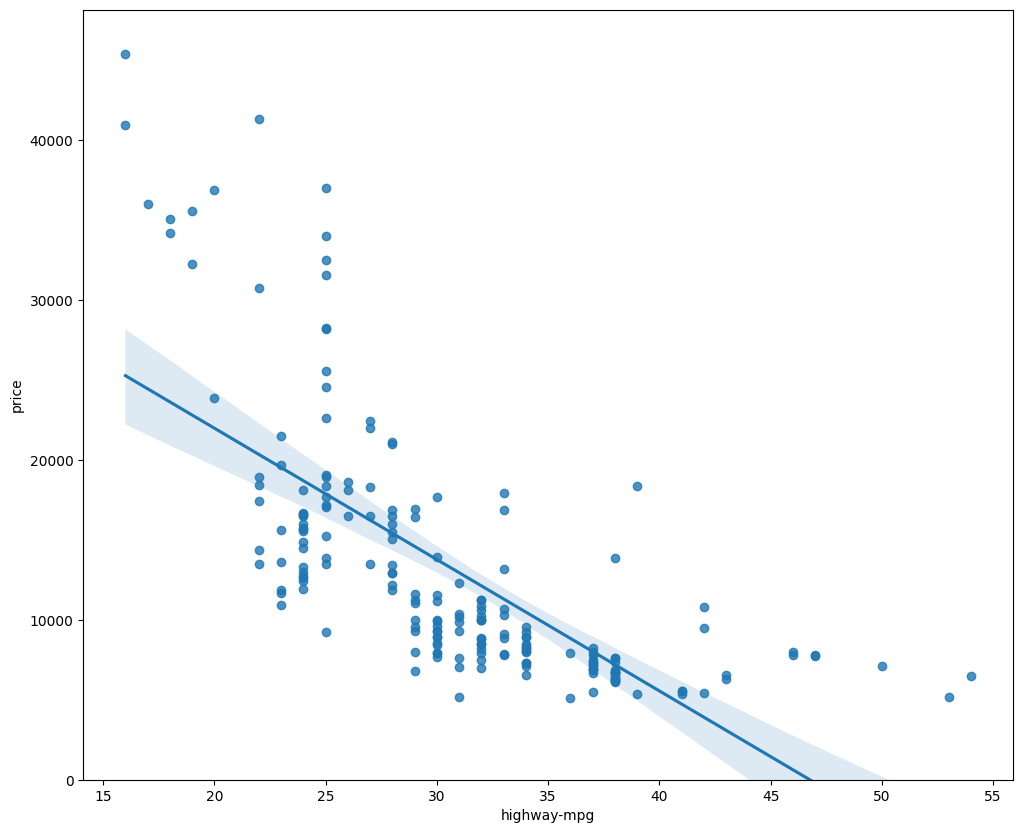

In [27]:
plt.figure(figsize=(12, 10))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

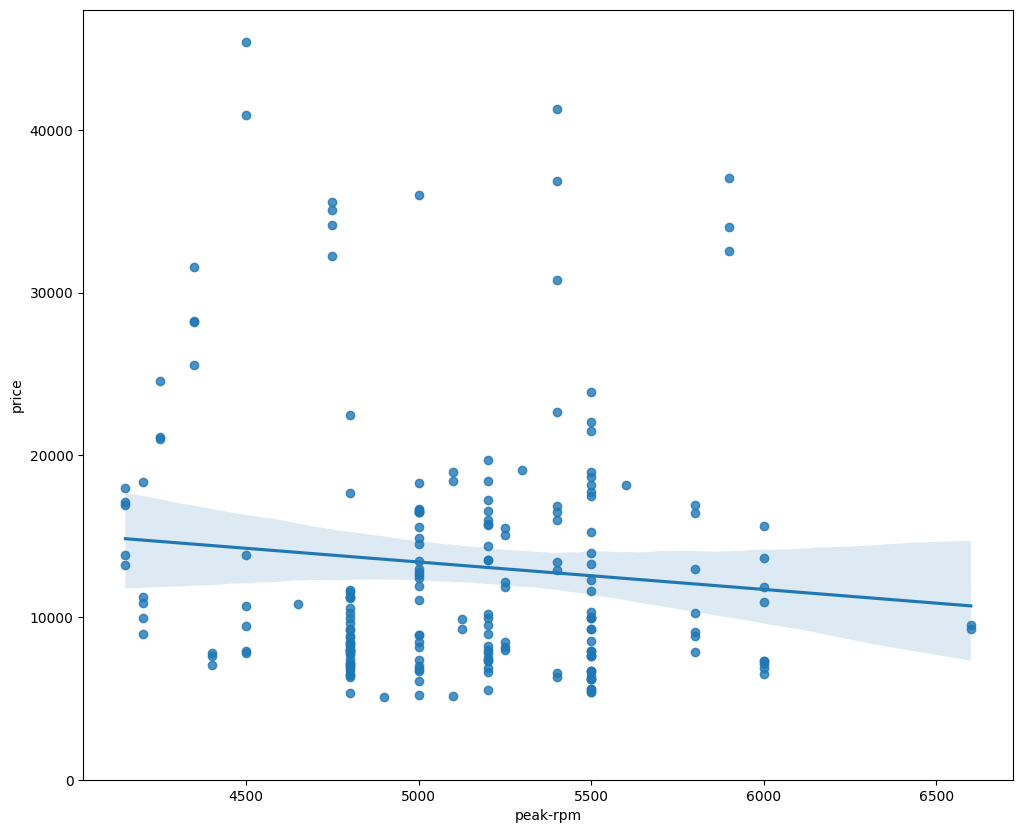

In [28]:
plt.figure(figsize=(12, 10))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

In [29]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

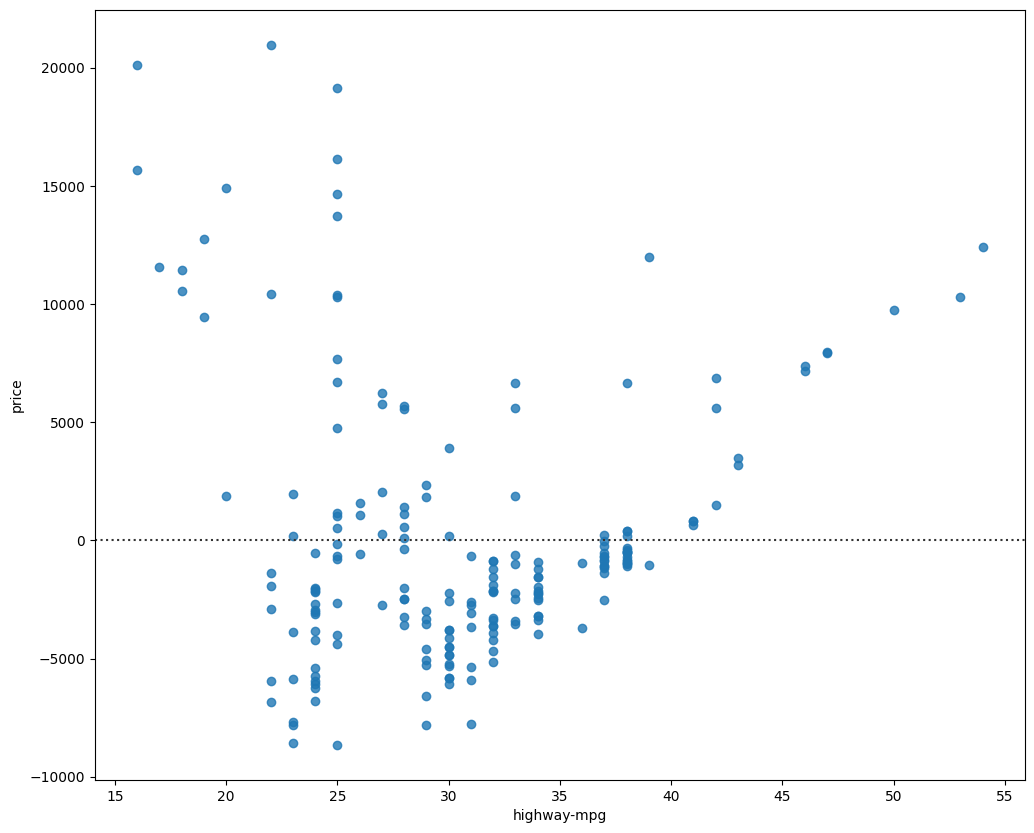

In [30]:
plt.figure(figsize=(12, 10))
sns.residplot(x='highway-mpg', y='price', data=df)

In [31]:
Y_hat = lm.predict(Z)

<ipython-input-32-c62561391067>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
<ipython-input-32-c62561391067>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values',

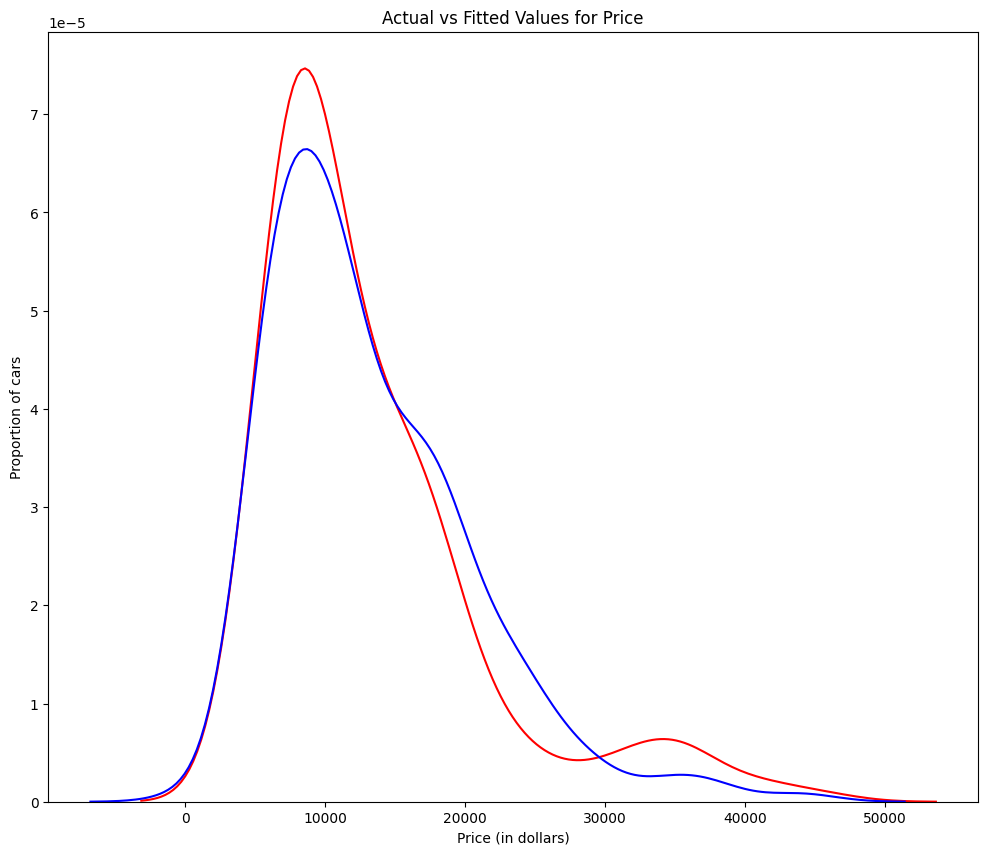

In [32]:
plt.figure(figsize=(12, 10))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of cars')
plt.show()
plt.close()

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x = df['highway-mpg']
y = df['price']

In [35]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


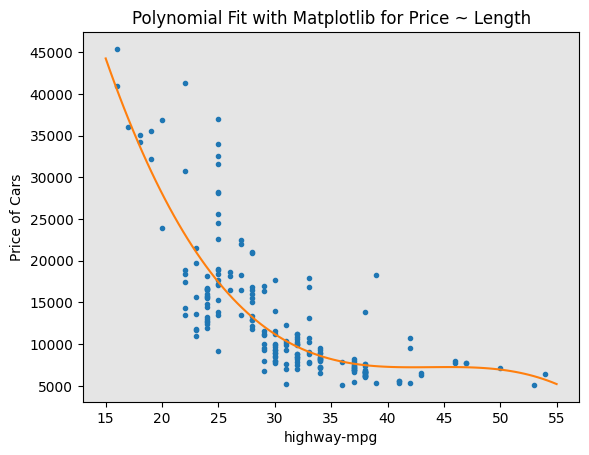

In [36]:
PlotPolly(p, x, y, 'highway-mpg')

In [37]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [38]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


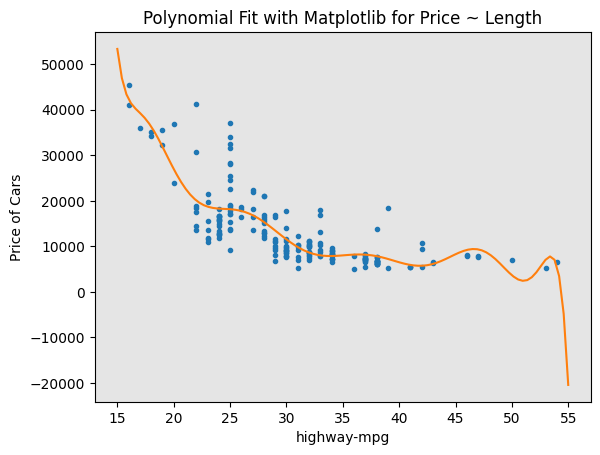

In [39]:
PlotPolly(p1, x, y, 'highway-mpg')

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pr = PolynomialFeatures(degree=2)

In [42]:
pr

PolynomialFeatures()

In [43]:
Z_pr = pr.fit_transform(Z)

In [44]:
Z_pr.shape

(201, 15)

In [45]:
Z.shape

(201, 4)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [48]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
Z = Z.astype(float)

In [50]:
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [52]:
lm.fit(X, Y)

LinearRegression()

In [54]:
print('The r-score is ', lm.score(X, Y))

The r-score is  0.4965911884339176


In [55]:
Yhat = lm.predict(X)
print('The output of the first four predicted value is ', Yhat[0:4])

The output of the first four predicted value is  [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean squared error of price and predicted value is ', mse)

The mean squared error of price and predicted value is  31635042.944639888


In [58]:
lm.fit(Z, Y)

LinearRegression()

In [59]:
print('The r-squared is ', lm.score(Z, Y))

The r-squared is  0.8093562806577457


In [60]:
Y_multi = lm.predict(Z)

In [61]:
print('The mean squared squared error of price and predicted value using mulitfit is ', mean_squared_error(df['price'], Y_multi))

The mean squared squared error of price and predicted value using mulitfit is  11980366.87072649


In [62]:
from sklearn.metrics import r2_score

In [63]:
r_squared = r2_score(y, p(x))
print('The r-squared value is ', r_squared)

The r-squared value is  0.674194666390652


In [64]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [65]:
%matplotlib inline

In [66]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [67]:
lm.fit(X, Y)

LinearRegression()

In [68]:
yhat = lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

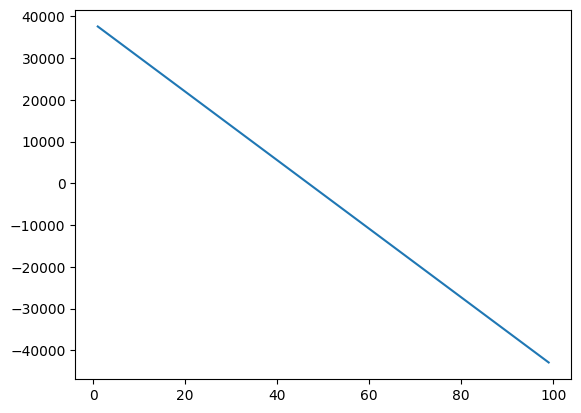

In [69]:
plt.plot(new_input, yhat)
plt.show()